Name: Mithun Kumar
Register No: 212224230160
Epoch 10/50, Loss: 1.0347
Epoch 20/50, Loss: 1.0021
Epoch 30/50, Loss: 1.3458
Epoch 40/50, Loss: 1.4392
Epoch 50/50, Loss: 0.7976

Name: Mithun Kumar
Register No: 212224230160
Test Accuracy: 48.11%
Confusion Matrix:
 [[228 124 102 130]
 [125 157 129  79]
 [ 77  77 260  58]
 [130  41  38 384]]
Classification Report:
               precision    recall  f1-score   support

           A       0.41      0.39      0.40       584
           B       0.39      0.32      0.35       490
           C       0.49      0.55      0.52       472
           D       0.59      0.65      0.62       593

    accuracy                           0.48      2139
   macro avg       0.47      0.48      0.47      2139
weighted avg       0.47      0.48      0.48      2139



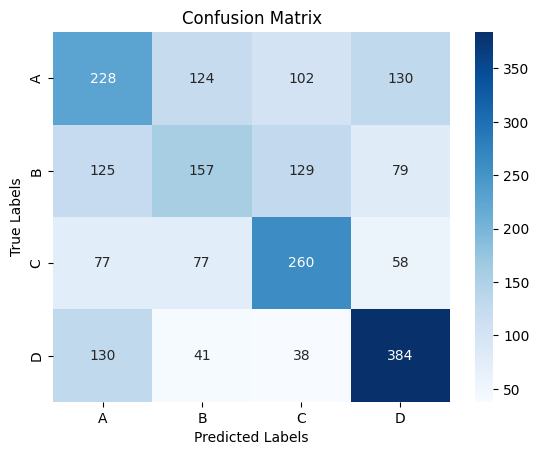


Name: Mithun Kumar
Register No: 212224230160
Predicted class for sample input: D
Actual class for sample input: D


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from torch.utils.data import TensorDataset, DataLoader
import seaborn as sns
import matplotlib.pyplot as plt

print("Name: Mithun Kumar")
print("Register No: 212224230160")

data = pd.read_csv("customers.csv")

data = data.drop(columns=["ID"])

data.fillna({"Work_Experience": 0, "Family_Size": data["Family_Size"].median()}, inplace=True)

categorical_columns = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1"]
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

label_encoder = LabelEncoder()
data["Segmentation"] = label_encoder.fit_transform(data["Segmentation"])

X = data.drop(columns=["Segmentation"])
y = data["Segmentation"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=16, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=16)

class PeopleClassifier(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 4)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = X_train.shape[1]
model = PeopleClassifier(input_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 50

for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

model.eval()
predictions, actuals = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.numpy())
        actuals.extend(y_batch.numpy())

accuracy = accuracy_score(actuals, predictions)
conf_matrix = confusion_matrix(actuals, predictions)
class_report = classification_report(actuals, predictions, target_names=label_encoder.classes_)

print("\nName: Mithun Kumar")
print("Register No: 212224230160")
print(f"Test Accuracy: {accuracy*100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

sample_input = X_test[12].unsqueeze(0)

with torch.no_grad():
    output = model(sample_input)
    predicted_class_index = torch.argmax(output[0]).item()
    predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]

print("\nName: Mithun Kumar")
print("Register No: 212224230160")
print(f"Predicted class for sample input: {predicted_class_label}")
print(f"Actual class for sample input: {label_encoder.inverse_transform([y_test[12].item()])[0]}")
